In [83]:
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
pd.set_option('display.max_columns', 500)
%matplotlib inline
import random


In [86]:
df = pd.read_csv('loan_cleaned_data_final.csv' , encoding='latin-1')
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,revol_util,total_acc,Verified,36 months,A to C,Own,5 years and below,more than 5 years,debt_consolidation
0,5000,5000,4975.0,10.65,162.87,24.000,0,27.65,0,1,0,13648,83.7,9,1,1,1,0,0,1,0
1,2500,2500,2500.0,15.27,59.83,30.000,1,1.00,0,5,0,1687,9.4,4,1,0,1,0,1,0,0
2,2400,2400,2400.0,15.96,84.33,12.252,0,8.72,0,2,0,2956,98.5,10,0,1,1,0,0,1,0
3,5000,5000,5000.0,7.90,156.46,36.000,0,11.20,0,3,0,7963,28.3,12,1,1,1,0,1,0,0
4,3000,3000,3000.0,18.64,109.43,48.000,0,5.35,0,2,0,8221,87.5,4,1,1,0,0,0,1,0


In [87]:
y = df['loan_status']
X = df.drop(['loan_status'], 1)

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = X.as_matrix().astype(np.float)
X_scaled = scaler.fit_transform(X)

Finding the optimum depth

In [89]:
# Randomly split data into training/testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.externals import joblib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

def generate_auc(X, y, clf_class, **kwargs):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:,1])
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc, thresholds


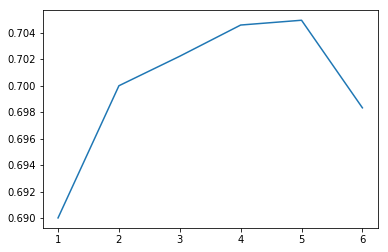

Optimal Boosting Tree Depth: 5


In [92]:
scores = []
depths = range(1,7)
for n in depths:
    fpr, tpr, roc_auc, thresholds = generate_auc(X, y, GradientBoostingClassifier, max_depth = n, random_state = 42)
    scores.append(roc_auc)
    

n_opt = depths[np.argmax(scores)]

plt.plot(depths,scores)
plt.show()
print("Optimal Boosting Tree Depth:", n_opt)


Predicting using Boosting

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [98]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

learning_rates = [0.0025,0.005, 0.01, 0.02, 0.025, 0.05, 0.1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=1000, learning_rate = learning_rate, max_depth = n_opt, random_state=42)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.4f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.4f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.0025
Accuracy score (training): 0.8496
Accuracy score (validation): 0.8539

Learning rate:  0.005
Accuracy score (training): 0.8541
Accuracy score (validation): 0.8531

Learning rate:  0.01
Accuracy score (training): 0.8606
Accuracy score (validation): 0.8543

Learning rate:  0.02
Accuracy score (training): 0.8738
Accuracy score (validation): 0.8539

Learning rate:  0.025
Accuracy score (training): 0.8802
Accuracy score (validation): 0.8522

Learning rate:  0.05
Accuracy score (training): 0.9117
Accuracy score (validation): 0.8505

Learning rate:  0.1
Accuracy score (training): 0.9611
Accuracy score (validation): 0.8446



In [99]:
# learning rate =0.01 gives the best accuracy score for testing data
gb = GradientBoostingClassifier(n_estimators=1000, learning_rate = 0.01, max_depth = 5, random_state = 42)
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print()
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[4476   27]
 [ 742   32]]

Classification Report
             precision    recall  f1-score   support

          0       0.86      0.99      0.92      4503
          1       0.54      0.04      0.08       774

avg / total       0.81      0.85      0.80      5277



In [100]:
scores_gb = gb.decision_function(X_test)
fpr_gb, tpr_gb, _ = roc_curve(y_test, scores_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.4f}".format(roc_auc_gb))

Area under ROC curve = 0.7020


In [101]:
from sklearn.externals import joblib
joblib.dump(gb, 'loan_boosting.pkl')

['loan_boosting.pkl']